In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import BASE_COLORS
%matplotlib inline
## sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df_chess = pd.read_csv('df_chess.csv')
display(df_chess.shape)
df_chess.head(3).T

(20058, 16)

,0,1,2
game_id,1,2,3
rated,False,True,True
turns,13,16,61
victory_status,Out of Time,Resign,Mate
winner,White,Black,White
white_id,bourgris,a-00,ischia
white_rating,1500,1322,1496
black_id,a-00,skinnerua,a-00
black_rating,1191,1261,1500
moves,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...


In [3]:
df_chess = df_chess.drop(['game_id'], axis=1)

In [4]:
df_chess["winner"] =df_chess["winner"].replace({"Black" : 1, "Draw" : 0, "White" : 2})

In [5]:
categorical=df_chess.select_dtypes(include=object)
numerical=df_chess.select_dtypes(include=np.number)

In [6]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   victory_status    20058 non-null  object
 1   white_id          20058 non-null  object
 2   black_id          20058 non-null  object
 3   moves             20058 non-null  object
 4   opening_code      20058 non-null  object
 5   opening_name      20058 non-null  object
 6   rating_gap_class  20058 non-null  object
dtypes: object(7)
memory usage: 1.1+ MB


In [7]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   turns                 20058 non-null  int64
 1   winner                20058 non-null  int64
 2   white_rating          20058 non-null  int64
 3   black_rating          20058 non-null  int64
 4   opening_moves         20058 non-null  int64
 5   rating_gap            20058 non-null  int64
 6   higher_rated_victory  20058 non-null  int64
dtypes: int64(7)
memory usage: 1.1 MB


In [8]:
numerical.isna().sum()

turns                   0
winner                  0
white_rating            0
black_rating            0
opening_moves           0
rating_gap              0
higher_rated_victory    0
dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


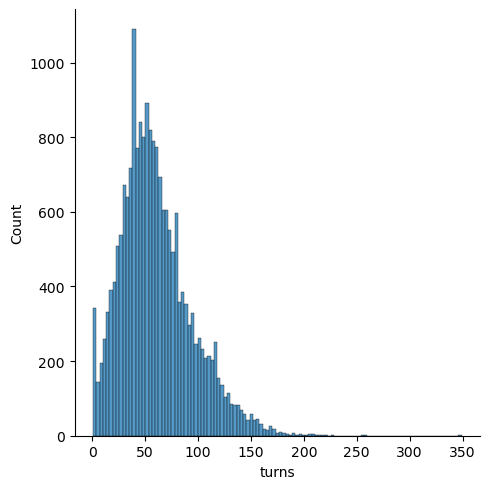

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


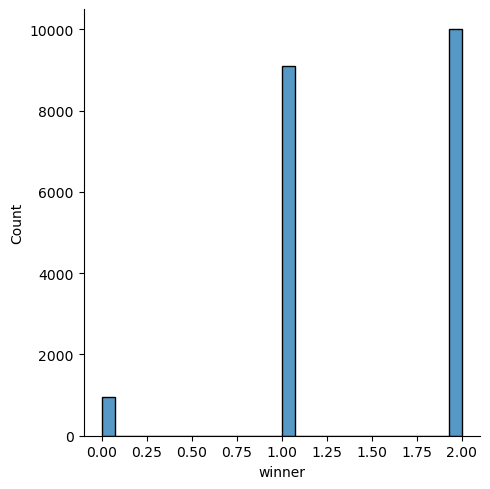

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


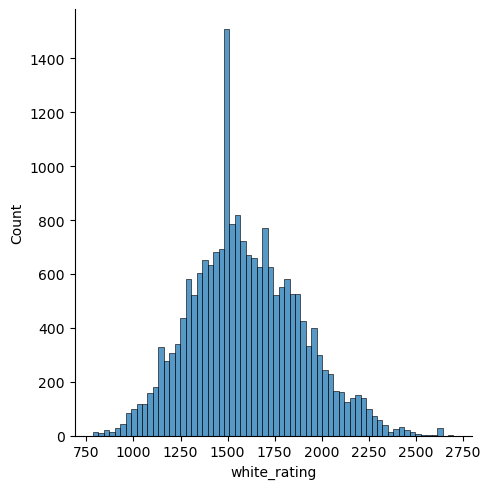

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


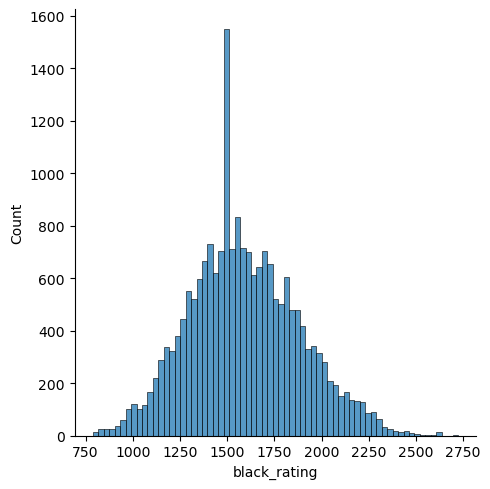

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


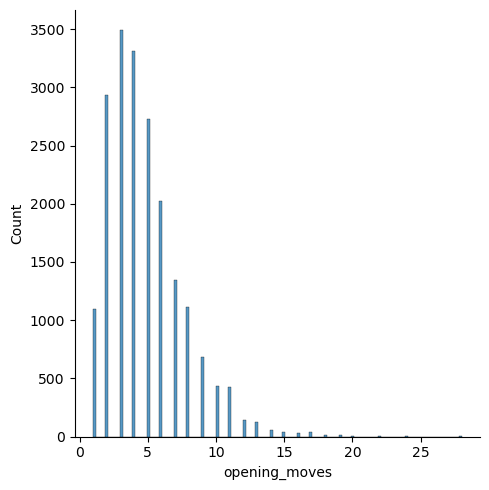

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


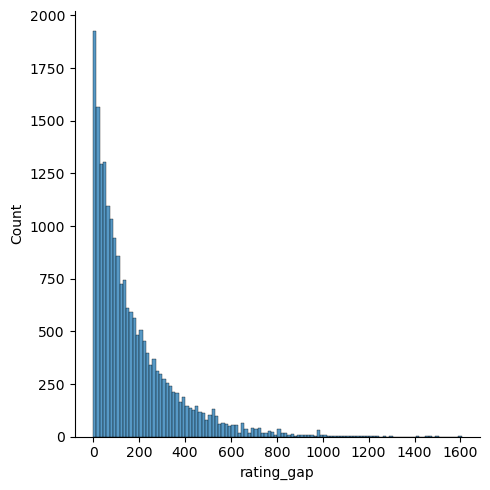

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


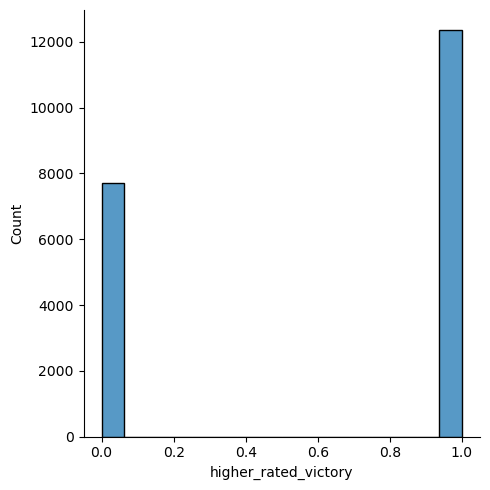

In [9]:
#Begin with Numerical Data

def plot_num(Dataframe):
    for column in Dataframe.columns:
        sns.displot(x=Dataframe[column])
        plt.show()
    return None
   

plot_num(numerical)

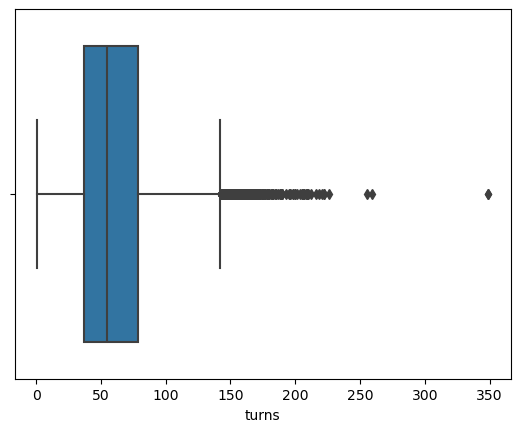

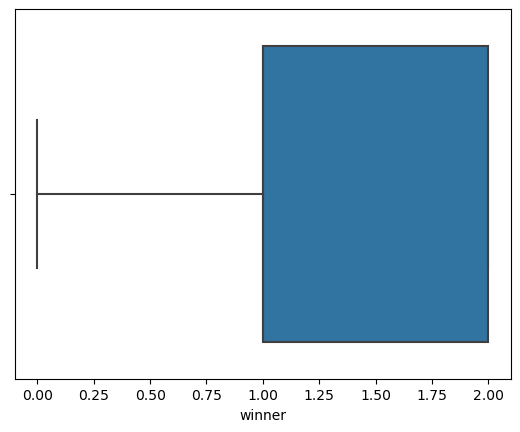

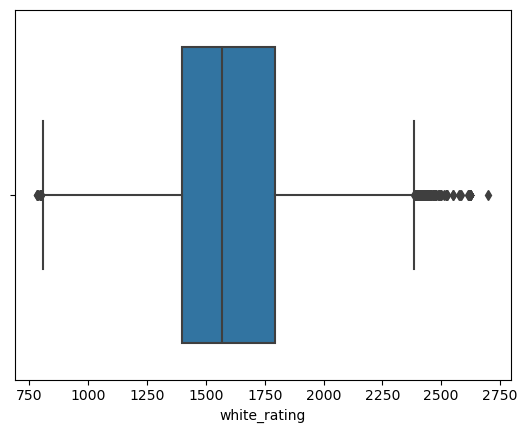

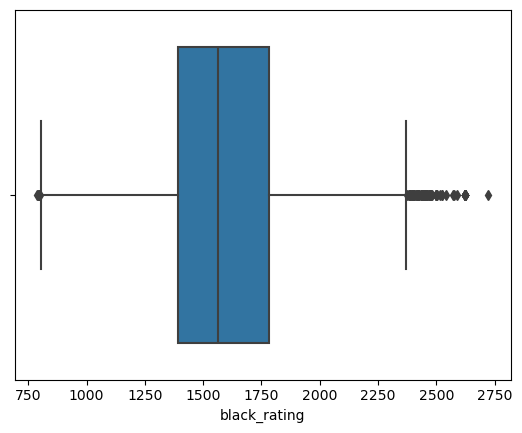

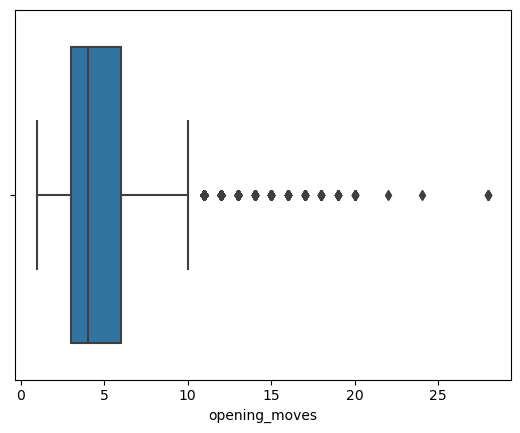

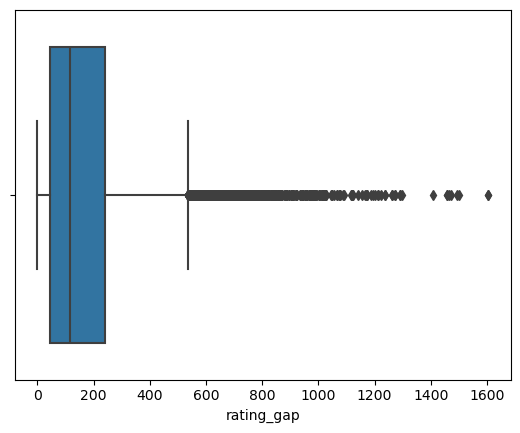

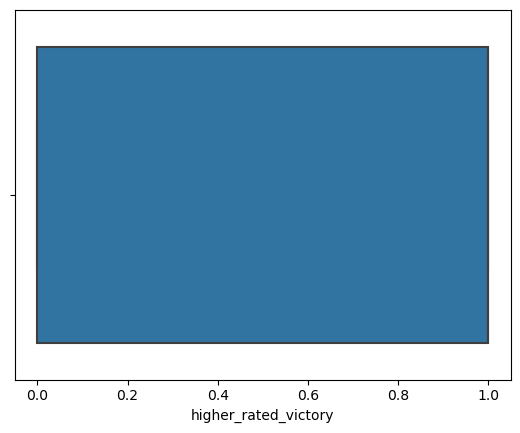

In [10]:
# Checking for outliers
def outlier(Dataframe):
    for column in Dataframe.columns:
        sns.boxplot(x=Dataframe[column])
        plt.show()
    return None
   
outlier(numerical)

In [11]:
def value_count(df):
    for columns in df:
            print (len(numerical[columns].value_counts()),':  ',columns)
    return

value_count(numerical)

211 :   turns
3 :   winner
1516 :   white_rating
1521 :   black_rating
23 :   opening_moves
894 :   rating_gap
2 :   higher_rated_victory


In [12]:
print('Old Shape', numerical.shape)

Old Shape (20058, 7)


In [13]:
def outliers(column, threshold = 3):
   
    data = column[abs(column.apply(lambda x: (x - column.mean()) / column.var() ** (1/2))) > threshold]
    
    return data

In [14]:
rating_gap_outliers = outliers(numerical["rating_gap"])

In [15]:
len(rating_gap_outliers)

379

In [16]:
turns_outliers = outliers(numerical["turns"])
len(turns_outliers)

152

In [17]:
numerical.shape[0]* 0.01

200.58

Finding discrete and continuous columns

In [18]:
def discrete_continuous(df):
    discrete_lst = []
    continuous_lst = []
    for col in df.columns:
        if len(df[col].unique()) < (df.shape[0] * 0.02):
            discrete_lst.append(col)
        else:
            continuous_lst.append(col)
    return (discrete_lst, continuous_lst)

In [19]:
discrete_lst, continuous_lst = discrete_continuous(numerical)

In [20]:
print('Discrete List:  ',discrete_lst)
print('Continuous List:   ',continuous_lst)

Discrete List:   ['turns', 'winner', 'opening_moves', 'higher_rated_victory']
Continuous List:    ['white_rating', 'black_rating', 'rating_gap']


In [21]:
num_discrete_df = numerical[['turns', 'opening_moves', 'higher_rated_victory']]
num_continuous_df = numerical[['white_rating', 'black_rating', 'rating_gap']]

In [22]:
num_continuous_df

,white_rating,black_rating,rating_gap
0,1500,1191,309
1,1322,1261,61
2,1496,1500,4
3,1439,1454,15
4,1523,1469,54
...,...,...,...
20053,1691,1220,471
20054,1233,1196,37
20055,1219,1286,67
20056,1360,1227,133


In [23]:
num_discrete_df

,turns,opening_moves,higher_rated_victory
0,13,5,1
1,16,4,0
2,61,3,0
3,61,3,0
4,95,5,1
...,...,...,...
20053,24,2,1
20054,82,2,0
20055,35,3,0
20056,109,4,1


Correlation

In [24]:
correlations = numerical.corr()
correlations

,turns,winner,white_rating,black_rating,opening_moves,rating_gap,higher_rated_victory
turns,1.000000,-0.129875,0.129753,0.160467,0.055999,-0.126531,-0.100774
winner,-0.129875,1.000000,0.093497,-0.160843,0.006809,0.027246,0.167343
white_rating,0.129753,0.093497,1.000000,0.634171,0.277379,0.073169,0.006713
black_rating,0.160467,-0.160843,0.634171,1.000000,0.255396,0.025191,-0.019153
opening_moves,0.055999,0.006809,0.277379,0.255396,1.000000,-0.016823,-0.028522
rating_gap,-0.126531,0.027246,0.073169,0.025191,-0.016823,1.000000,0.234237
higher_rated_victory,-0.100774,0.167343,0.006713,-0.019153,-0.028522,0.234237,1.000000


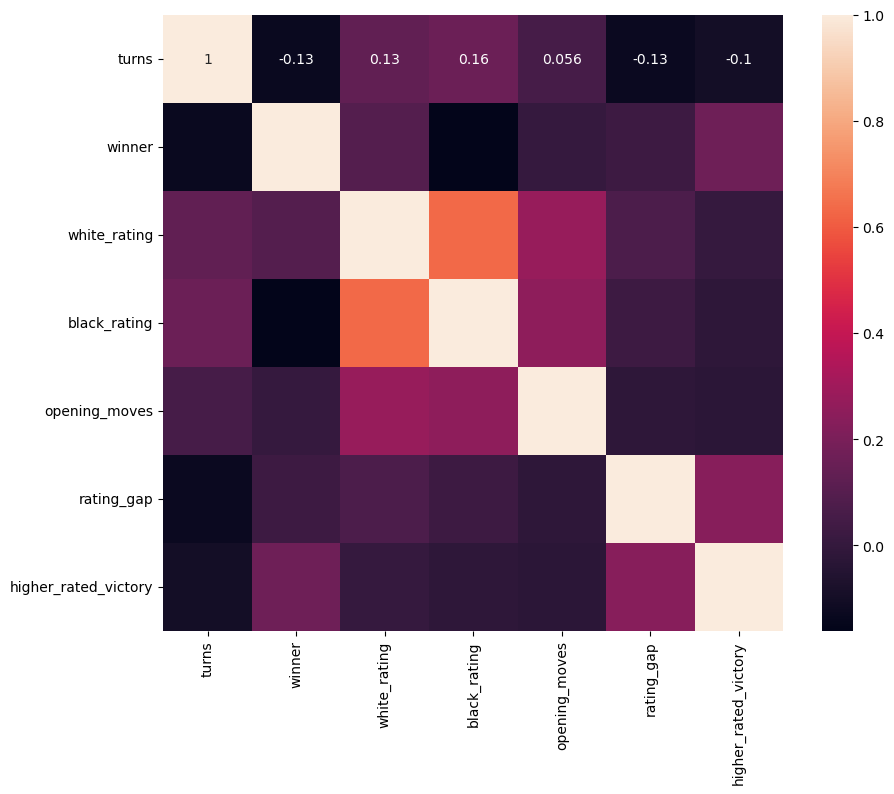

In [25]:
fig, ax=plt.subplots(figsize=(10, 8))
ax=sns.heatmap(numerical.corr(), annot=True)
plt.show()

In [26]:
numerical.to_csv('num_cleaned_chess.csv', index=False)

Categorical features

In [27]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   victory_status    20058 non-null  object
 1   white_id          20058 non-null  object
 2   black_id          20058 non-null  object
 3   moves             20058 non-null  object
 4   opening_code      20058 non-null  object
 5   opening_name      20058 non-null  object
 6   rating_gap_class  20058 non-null  object
dtypes: object(7)
memory usage: 1.1+ MB


In [28]:
categorical.head()

,victory_status,white_id,black_id,moves,opening_code,opening_name,rating_gap_class
0,Out of Time,bourgris,a-00,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense,>250
1,Resign,a-00,skinnerua,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense,51-100
2,Mate,ischia,a-00,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game,0-50
3,Mate,daniamurashov,adivanov2009,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game,0-50
4,Mate,nik221107,adivanov2009,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,51-100


In [29]:
categorical = categorical.drop(['white_id','black_id','moves'], axis=1)
categorical.head()

,victory_status,opening_code,opening_name,rating_gap_class
0,Out of Time,D10,Slav Defense,>250
1,Resign,B00,Nimzowitsch Defense,51-100
2,Mate,C20,King's Pawn Game,0-50
3,Mate,D02,Queen's Pawn Game,0-50
4,Mate,C41,Philidor Defense,51-100


In [30]:
categorical.columns

Index(['victory_status', 'opening_code', 'opening_name', 'rating_gap_class'], dtype='object')

Saving the categorical at this point before encoding

In [31]:
categorical.to_csv('cat_cleaned_chess.csv', index=False)

Concatenating numerical and categorical

In [32]:
X = pd.concat([numerical,categorical], axis=1)

In [33]:
X

,turns,winner,white_rating,black_rating,opening_moves,rating_gap,higher_rated_victory,victory_status,opening_code,opening_name,rating_gap_class
0,13,2,1500,1191,5,309,1,Out of Time,D10,Slav Defense,>250
1,16,1,1322,1261,4,61,0,Resign,B00,Nimzowitsch Defense,51-100
2,61,2,1496,1500,3,4,0,Mate,C20,King's Pawn Game,0-50
3,61,2,1439,1454,3,15,0,Mate,D02,Queen's Pawn Game,0-50
4,95,2,1523,1469,5,54,1,Mate,C41,Philidor Defense,51-100
...,...,...,...,...,...,...,...,...,...,...,...
20053,24,2,1691,1220,2,471,1,Resign,A80,Dutch Defense,>250
20054,82,1,1233,1196,2,37,0,Mate,A41,Queen's Pawn,0-50
20055,35,2,1219,1286,3,67,0,Mate,D00,Queen's Pawn Game,51-100
20056,109,2,1360,1227,4,133,1,Resign,B07,Pirc Defense,101-150


In [34]:
print(X.columns)

Index(['turns', 'winner', 'white_rating', 'black_rating', 'opening_moves',
       'rating_gap', 'higher_rated_victory', 'victory_status', 'opening_code',
       'opening_name', 'rating_gap_class'],
      dtype='object')


Train/test/split data
Splitting / Scaling / 1Hot encoding X_train and X_test

In [35]:
y=X['winner']
X=X.drop('winner', axis=1)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train shape is:',X_train.shape)
print('y_train shape is:', y_train.shape)
print('X_test shape is:', X_test.shape)
print('y_test shape is:', y_test.shape)

X_train shape is: (16046, 10)
y_train shape is: (16046,)
X_test shape is: (4012, 10)
y_test shape is: (4012,)


In [37]:
X_train["rating_gap_class"] =X_train["rating_gap_class"].map({"0-50" : 0, "51-100" :.5, "101-150" : 1, "151-200" : 1.7, "201-250" : 2.5, ">250" : 4})

OneHotEncode the remaining categorical columns

In [38]:
X_train_1_hot_col = X_train[['victory_status','opening_code','opening_name']]
X_train_1_hot_col

,victory_status,opening_code,opening_name
10387,Resign,C02,French Defense
6077,Resign,B00,Owen Defense
3379,Out of Time,B21,Sicilian Defense
2635,Mate,B22,Sicilian Defense
10548,Resign,C02,French Defense
...,...,...,...
11284,Out of Time,C20,King's Pawn Game
11964,Out of Time,C00,French Defense
5390,Resign,D30,Queen's Gambit
860,Resign,B07,Rat Defense


In [39]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(X_train_1_hot_col)

cols = encoder.get_feature_names_out(input_features = X_train_1_hot_col.columns)

X_train_col_encoded = pd.DataFrame(encoder.transform(X_train_1_hot_col).toarray(),columns=cols)

X_train_col_encoded

,victory_status_Mate,victory_status_Out of Time,victory_status_Resign,opening_code_A01,opening_code_A02,opening_code_A03,opening_code_A04,opening_code_A05,opening_code_A06,opening_code_A07,...,opening_name_Trompowsky Attack,opening_name_Valencia Opening,opening_name_Van Geet Opening,opening_name_Van't Kruijs Opening,opening_name_Vienna Game,opening_name_Wade Defense,opening_name_Ware Defense,opening_name_Ware Opening,opening_name_Yusupov-Rubinstein System,opening_name_Zukertort Opening
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16041,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16042,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16043,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16044,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
X_test_1_hot_col = X_test[['victory_status','opening_code','opening_name']]
X_test_1_hot_col

,victory_status,opening_code,opening_name
19390,Resign,A80,Dutch Defense
4226,Mate,C40,Latvian Gambit
18893,Resign,B34,Sicilian Defense
15231,Resign,E88,King's Indian Defense
13987,Resign,C20,King's Pawn Game
...,...,...,...
12136,Resign,D10,Slav Defense
13103,Mate,C20,King's Pawn Game
10564,Mate,C42,Russian Game
4104,Mate,C46,Four Knights Game


In [41]:
# there are some categories in the test data that were not present in the training data. 
#To deal with that I applied (handle_unknown + ignore)commend. 
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(X_train_1_hot_col)
cols1 = encoder.get_feature_names_out(input_features = X_test_1_hot_col.columns)

X_test_col_encoded = pd.DataFrame(encoder.transform( X_test_1_hot_col).toarray(),columns=cols1)

X_test_col_encoded

,victory_status_Draw,victory_status_Mate,victory_status_Out of Time,victory_status_Resign,opening_code_A00,opening_code_A01,opening_code_A02,opening_code_A03,opening_code_A04,opening_code_A05,...,opening_name_Trompowsky Attack,opening_name_Valencia Opening,opening_name_Van Geet Opening,opening_name_Van't Kruijs Opening,opening_name_Vienna Game,opening_name_Wade Defense,opening_name_Ware Defense,opening_name_Ware Opening,opening_name_Yusupov-Rubinstein System,opening_name_Zukertort Opening
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4008,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4009,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4010,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
X_train = X_train.drop(['victory_status','opening_code','opening_name','rating_gap_class'],axis = 1)
X_train=X_train.reset_index()
X_train

,index,turns,white_rating,black_rating,opening_moves,rating_gap,higher_rated_victory
0,10387,57,1480,1393,7,87,1
1,6077,22,1963,1380,2,583,0
2,3379,53,1888,1831,3,57,1
3,2635,58,1400,1451,3,51,1
4,10548,59,1610,1617,7,7,0
...,...,...,...,...,...,...,...
16041,11284,24,1061,1133,3,72,1
16042,11964,5,2454,1746,3,708,1
16043,5390,45,1530,1503,4,27,1
16044,860,52,1851,1679,4,172,0


In [43]:
X_test = X_test.drop(['victory_status','opening_code','opening_name','rating_gap_class'],axis = 1)
X_test = X_test.reset_index()
X_test

,index,turns,white_rating,black_rating,opening_moves,rating_gap,higher_rated_victory
0,19390,61,1919,1798,2,121,1
1,4226,86,1195,1123,4,72,0
2,18893,27,1867,1932,9,65,1
3,15231,79,1823,1770,14,53,1
4,13987,37,1371,1193,3,178,1
...,...,...,...,...,...,...,...
4007,12136,59,1844,1589,5,255,1
4008,13103,8,1605,1735,2,130,1
4009,10564,35,1610,1500,6,110,1
4010,4104,53,1184,1269,7,85,0


In [44]:
X_train = X_train.drop('index', axis=1)
X_test = X_test.drop('index',axis=1)

In [45]:
X_train_encoded= pd.concat([X_train,X_train_col_encoded],axis=1)
X_train_encoded= X_train_encoded.reset_index()
X_train_encoded= X_train_encoded.drop('index',axis=1)

In [46]:
X_test_encoded= pd.concat([X_test,X_test_col_encoded],axis=1)
X_test_encoded= X_test_encoded.reset_index()
X_test_encoded= X_test_encoded.drop('index',axis=1)
X_test_encoded

,turns,white_rating,black_rating,opening_moves,rating_gap,higher_rated_victory,victory_status_Draw,victory_status_Mate,victory_status_Out of Time,victory_status_Resign,...,opening_name_Trompowsky Attack,opening_name_Valencia Opening,opening_name_Van Geet Opening,opening_name_Van't Kruijs Opening,opening_name_Vienna Game,opening_name_Wade Defense,opening_name_Ware Defense,opening_name_Ware Opening,opening_name_Yusupov-Rubinstein System,opening_name_Zukertort Opening
0,61,1919,1798,2,121,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,86,1195,1123,4,72,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27,1867,1932,9,65,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,79,1823,1770,14,53,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,37,1371,1193,3,178,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007,59,1844,1589,5,255,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4008,8,1605,1735,2,130,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4009,35,1610,1500,6,110,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4010,53,1184,1269,7,85,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
X_test_encoded.head

<bound method NDFrame.head of       turns  white_rating  black_rating  opening_moves  rating_gap  \
0        61          1919          1798              2         121   
1        86          1195          1123              4          72   
2        27          1867          1932              9          65   
3        79          1823          1770             14          53   
4        37          1371          1193              3         178   
...     ...           ...           ...            ...         ...   
4007     59          1844          1589              5         255   
4008      8          1605          1735              2         130   
4009     35          1610          1500              6         110   
4010     53          1184          1269              7          85   
4011     22          1360          1332              1          28   

      higher_rated_victory  victory_status_Draw  victory_status_Mate  \
0                        1                  0.0          

Standardize needed columns

In [48]:
X_train.dtypes

turns                   int64
white_rating            int64
black_rating            int64
opening_moves           int64
rating_gap              int64
higher_rated_victory    int64
dtype: object

In [49]:
X_train_to_scale = X_train[['turns', 'white_rating', 'black_rating', 'rating_gap','opening_moves']]
X_train_to_scale
X_test_to_scale = X_test[['turns', 'white_rating', 'black_rating', 'rating_gap','opening_moves']]
X_test_to_scale

,turns,white_rating,black_rating,rating_gap,opening_moves
0,61,1919,1798,121,2
1,86,1195,1123,72,4
2,27,1867,1932,65,9
3,79,1823,1770,53,14
4,37,1371,1193,178,3
...,...,...,...,...,...
4007,59,1844,1589,255,5
4008,8,1605,1735,130,2
4009,35,1610,1500,110,6
4010,53,1184,1269,85,7


Initialize and fit the scaler

In [50]:
transformer = MinMaxScaler().fit(X_train_to_scale)

In [51]:
X_norm1 = transformer.transform(X_train_to_scale)
X_train_scaled = pd.DataFrame(X_norm1, columns=X_train_to_scale.columns)
X_train_scaled = X_train_scaled.reset_index()

In [52]:
X_norm2 = transformer.transform(X_test_to_scale)
X_test_scaled = pd.DataFrame(X_norm2, columns=X_test_to_scale.columns)
X_test_scaled= X_test_scaled.reset_index()

In [53]:
X_train = X_train.drop(['turns', 'white_rating', 'black_rating', 'rating_gap','opening_moves'],axis = 1)
X_test = X_test.drop(['turns', 'white_rating', 'black_rating', 'rating_gap','opening_moves'],axis = 1)

In [54]:
X_train_s_e = pd.concat([X_train, X_train_scaled],axis = 1)
X_test_s_e = pd.concat([X_test, X_test_scaled], axis = 1)

In [55]:
X_train_s_e.isna().sum()

higher_rated_victory    0
index                   0
turns                   0
white_rating            0
black_rating            0
rating_gap              0
opening_moves           0
dtype: int64

Models

In [56]:
# The function to run all models
def models_automation(models, X_tr, y_tr,X_te, y_te):
    for model in models:
        model.fit(X_tr, y_tr)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_tr, y_tr)}, Test -> {model.score(X_te, y_te)}")

In [60]:
model_list = [LinearRegression(),SGDRegressor(),KNeighborsRegressor(), MLPRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]
models_automation(model_list, X_train_s_e, y_train, X_test_s_e, y_test)

LinearRegression: Train -> 0.12335853194267443, Test -> 0.13780894609948768
SGDRegressor: Train -> -4.7185506338109565e+32, Test -> -2.9375965932580284e+31
KNeighborsRegressor: Train -> 0.211111886747817, Test -> -0.18473963489830325
MLPRegressor: Train -> -0.16290969934811206, Test -> -0.1916053078120057
DecisionTreeRegressor: Train -> 1.0, Test -> 0.3641203341844268
RandomForestRegressor: Train -> 0.9531173075802368, Test -> 0.6609334281405057


Random Forest Regressor: This model shows the best balance between training and test performance,
The random forest regressor model explains around 95.3% of the variance in the train dataset and around 65.6% of the variance in the test dataset. 
The performance is good on both datasets, with a slight drop in performance on the test dataset compared to the train dataset. 
The model is not overfitting and has good generalization ability compared other models.

Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)
print('training set score:{:3f}'.format(logreg.score(X_train,y_train)))
print('test set score:{:3f}'.format(logreg.score(X_test,y_test)))

training set score:0.498380
test set score:0.499501


Looking at confusion matrix

In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
prediction = logreg.predict(X_test)

In [66]:
prediction

array([2, 2, 2, ..., 2, 2, 2])

In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
prediction = logreg.predict(X_test)
confusion_matrix(y_test,prediction) 

array([[   0,    0,  192],
       [   0,    0, 1816],
       [   0,    0, 2004]])

In [69]:
#Let's check balance of target
y.value_counts()

winner
2    10001
1     9107
0      950
Name: count, dtype: int64

In [70]:
confusion_matrix(y_test,prediction)

array([[   0,    0,  192],
       [   0,    0, 1816],
       [   0,    0, 2004]])

In [72]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [73]:
print('accuracy = ', accuracy_score(y_test, prediction))
print('precision = ', precision_score(y_test, prediction))
print('recall = ', recall_score(y_test, prediction))
print('f1 = ', f1_score(y_test, prediction))

accuracy =  0.4995014955134596


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [75]:
# SMOTE for imbalanced data
from imblearn.over_sampling import SMOTE
def over_sampling(training_x, training_y):

    smote = SMOTE(random_state = 100, k_neighbors = 3)
    X_train_scaled_SMOTE, y_train_SMOTE = smote.fit_resample(training_x, training_y)

    return X_train_scaled_SMOTE, y_train_SMOTE    

X_train_SMOTE, y_train_SMOTE = over_sampling(X_train, y_train)
logreg2 = LogisticRegression().fit(X_train_SMOTE, y_train_SMOTE)
print('training set score:{:3f}'.format(logreg.score(X_train_SMOTE,y_train_SMOTE)))
print('test set score:{:3f}'.format(logreg.score(X_test,y_test)))

training set score:0.333333
test set score:0.499501


In [77]:
#Running logistic regression again on SMOTE data
prediction_SMOTE = logreg2.predict(X_test)
confusion_matrix(y_test, prediction_SMOTE)
print('accuracy = ', accuracy_score(y_test, prediction_SMOTE))
print('precision = ', precision_score(y_test, prediction_SMOTE))
print('recall = ', recall_score(y_test, prediction_SMOTE))
print('f1 = ', f1_score(y_test, prediction_SMOTE))

accuracy =  0.3793619142572283


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].